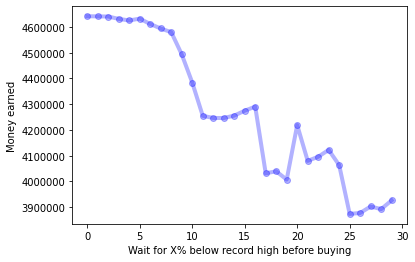

In [18]:
import csv
import matplotlib.pyplot as plt # pip install matplotlib

results = list()
closing_val_index = 4
monthlySaving = 1000.0

with open('HistoricalPrices.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    next(spamreader)#skip header
    l = list(spamreader)
    
    for percentToBuy in range(0, 30):
        curMax = 0.0
        buys = list()
        total = 0
        moneyAvailable = float(0)
        totalRecords = 0
        lastClosingValue = float(l[0][closing_val_index])
        prevMonth = 0
        
        for row in reversed(l):
            closeVal = row[closing_val_index]
            month = int(row[0].split("/")[0])
            if prevMonth != month:
                prevMonth = month
                moneyAvailable += monthlySaving
            if float(closeVal)>curMax:
                curMax = float(closeVal)
                totalRecords += 1
            if moneyAvailable>0 and ((float(curMax)/float(closeVal)-1.0)*100)>=percentToBuy:
                buys.append(moneyAvailable*lastClosingValue/float(closeVal))
                moneyAvailable = 0;            
        
        for buy in buys:
            total += buy
    
        total += moneyAvailable
        results.append(total)

plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 5000000), useOffset=False)
plt.plot(results, marker='o', alpha=0.3, color='b', linewidth=4)
plt.ylabel('Money earned')
plt.xlabel('Wait for X% below record high before buying')
plt.show()
        